In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing dataset
data=pd.read_csv('train_v9rqX0R.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
data.shape

(8523, 12)

In [6]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# Item_Weight and Outlet_Size contain null values
# fill the missing values

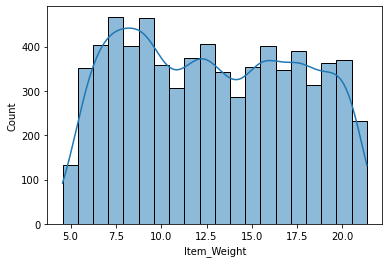

In [8]:
sns.histplot(data['Item_Weight'],kde=True)
plt.show()

In [9]:
#we can use the interpolate function

In [10]:
data['Item_Weight']=data['Item_Weight'].interpolate()

In [11]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

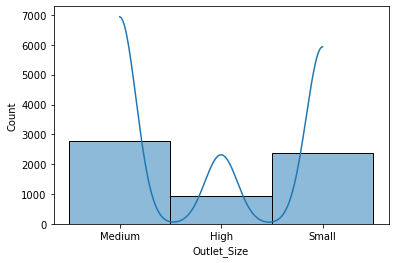

In [12]:
sns.histplot(data['Outlet_Size'],kde=True)
plt.show()

In [13]:
# it is object type data. So we can fill using mode
data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].fillna("Unknown"))

In [14]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [16]:
data['Item_Identifier']=label_encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content']=label_encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type']=label_encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier']=label_encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size']=label_encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']=label_encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']=label_encoder.fit_transform(data['Outlet_Type'])

In [17]:
data.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.831222,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.736360,1.112871,1.201220,2181.288914
std,449.222377,4.445074,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.989181,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.000000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.600000,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,2.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.600000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,3.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,3.000000,2.000000,3.000000,13086.964800


In [18]:
x=data.drop(['Item_Outlet_Sales'],axis=1)
y=data['Item_Outlet_Sales']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [20]:
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=42, test_size=0.25)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()
model= lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [23]:
print('The mean squared error value is:', mean_squared_error(y_test,predictions))

The mean squared error value is: 1366089.5149634457


In [24]:
#importing test data

In [25]:
test_data=pd.read_csv('test_AbJTz2l.csv')

In [26]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [27]:
test_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [28]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [29]:
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [30]:
test_data['Item_Weight']=test_data['Item_Weight'].interpolate()

In [31]:
test_data['Outlet_Size']=test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].fillna("Unknown"))

In [32]:
test_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [33]:
test_data['Item_Identifier']=label_encoder.fit_transform(test_data['Item_Identifier'])
test_data['Item_Fat_Content']=label_encoder.fit_transform(test_data['Item_Fat_Content'])
test_data['Item_Type']=label_encoder.fit_transform(test_data['Item_Type'])
test_data['Outlet_Identifier']=label_encoder.fit_transform(test_data['Outlet_Identifier'])
test_data['Outlet_Size']=label_encoder.fit_transform(test_data['Outlet_Size'])
test_data['Outlet_Location_Type']=label_encoder.fit_transform(test_data['Outlet_Location_Type'])
test_data['Outlet_Type']=label_encoder.fit_transform(test_data['Outlet_Type'])

In [34]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.7500,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.3000,4,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.6000,1,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.3150,1,0.015388,13,155.0340,2,2007,3,1,1
4,1184,8.5575,2,0.118599,4,234.2300,5,1985,1,2,3


In [35]:
prediction1=model.predict(test_data)

In [36]:
prediction1=pd.DataFrame(prediction1)
prediction1.head()

,0
0,1899.677143
1,1163.544462
2,2344.603564
3,2109.534346
4,5120.178651


In [37]:
prediction1[prediction1 < 0] = 0

In [38]:
prediction1.describe()

,0
count,5681.000000
mean,2198.241723
std,1188.619021
min,0.000000
25%,1319.979237
50%,2154.861100
75%,3016.083296
max,5804.251726


In [39]:
# for sample submission

In [40]:
sample=pd.read_csv('sample_submission_8RXa3c6.csv')
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [41]:
sample=sample.drop('Item_Outlet_Sales',axis=1)

In [42]:
sample

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027
...,...,...
5676,FDB58,OUT046
5677,FDD47,OUT018
5678,NCO17,OUT045
5679,FDJ26,OUT017


In [43]:
subm=pd.concat([sample,prediction1],axis=1)

In [44]:
subm

,Item_Identifier,Outlet_Identifier,0
0,FDW58,OUT049,1899.677143
1,FDW14,OUT017,1163.544462
2,NCN55,OUT010,2344.603564
3,FDQ58,OUT017,2109.534346
4,FDY38,OUT027,5120.178651
...,...,...,...
5676,FDB58,OUT046,2397.575676
5677,FDD47,OUT018,2997.062674
5678,NCO17,OUT045,1758.009990
5679,FDJ26,OUT017,3114.458232


In [45]:
subm.rename(columns={0:'Item_Outlet_Sales'},inplace=True)
subm

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1899.677143
1,FDW14,OUT017,1163.544462
2,NCN55,OUT010,2344.603564
3,FDQ58,OUT017,2109.534346
4,FDY38,OUT027,5120.178651
...,...,...,...
5676,FDB58,OUT046,2397.575676
5677,FDD47,OUT018,2997.062674
5678,NCO17,OUT045,1758.009990
5679,FDJ26,OUT017,3114.458232


In [46]:
subm.describe()

,Item_Outlet_Sales
count,5681.000000
mean,2198.241723
std,1188.619021
min,0.000000
25%,1319.979237
50%,2154.861100
75%,3016.083296
max,5804.251726


In [47]:
subm.to_csv('submission_file1.csv',index=False)